# Ensemble : Boosting

## 1.환경준비

### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

In [2]:
path = 'https://bit.ly/3EZKMUU'
data = pd.read_csv(path)
data.head()

,defeat,datetime,v021,v087,v088,v089,v114,v115,v116,v117,...,v527,v528,v571,v572,v573,v574,v575,v576,v577,v578
0,normal,19/07/2008 11:55:00,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,...,0.5064,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509
1,normal,19/07/2008 12:32:00,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,...,0.8832,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003
2,defeat,19/07/2008 13:17:00,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,...,0.6451,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721
3,normal,19/07/2008 14:43:00,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,...,0.7404,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831
4,normal,19/07/2008 15:22:00,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,...,2.2181,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698


In [3]:
data.drop('datetime', axis=1, inplace=True)

In [10]:
data = pd.get_dummies(data, columns=['defeat'], drop_first=True)

In [11]:
data.columns

Index(['v021', 'v087', 'v088', 'v089', 'v114', 'v115', 'v116', 'v117', 'v118',
       'v120', 'v121', 'v157', 'v222', 'v223', 'v224', 'v249', 'v250', 'v251',
       'v252', 'v253', 'v255', 'v256', 'v292', 'v360', 'v361', 'v362', 'v387',
       'v388', 'v389', 'v390', 'v391', 'v393', 'v394', 'v430', 'v494', 'v495',
       'v496', 'v521', 'v522', 'v523', 'v524', 'v525', 'v527', 'v528', 'v571',
       'v572', 'v573', 'v574', 'v575', 'v576', 'v577', 'v578',
       'defeat_normal'],
      dtype='object')

In [12]:
x = data.drop('defeat_normal', axis=1)
y = data.loc[:, 'defeat_normal']

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=2022)

In [14]:
model = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=50)

In [15]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [16]:
model.feature_importances_

array([0.01739737, 0.01957975, 0.01428715, 0.0162514 , 0.02670237,
       0.01759297, 0.02342662, 0.02406211, 0.01735195, 0.02224962,
       0.01645445, 0.02001547, 0.02174352, 0.02194449, 0.01132895,
       0.02792332, 0.        , 0.01154135, 0.01689753, 0.02435671,
       0.02060857, 0.01849868, 0.02222427, 0.01647287, 0.02847588,
       0.03316666, 0.02999183, 0.        , 0.025023  , 0.        ,
       0.02384351, 0.01272227, 0.01452579, 0.02475785, 0.02021942,
       0.01621609, 0.02489281, 0.0105055 , 0.        , 0.03287369,
       0.0181737 , 0.01956094, 0.01819862, 0.02065217, 0.02490119,
       0.02617865, 0.02214654, 0.02419339, 0.01611208, 0.0239689 ,
       0.01852826, 0.02125984], dtype=float32)

In [18]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

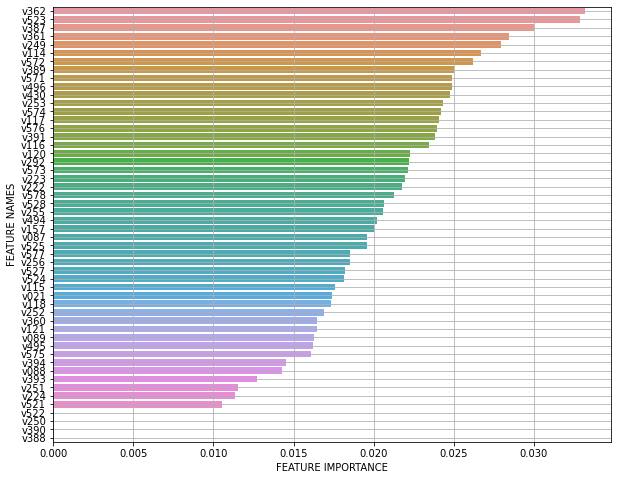

In [19]:
# max_depth = 3으로 설정하여 다른 변수들의 중요도가 산출되지 않는 것
result = plot_feature_importance(model.feature_importances_, x_train.columns)

### (2) 데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (1-이탈, 0-잔류, Target 변수)


In [2]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3178,3179,0,119512,51,31,248566,229,5,2,very_sat,very_high,considering,1
14926,14927,1,142144,192,15,774317,581,29,4,unsat,very_little,never_thought,1
15116,15117,1,142308,0,79,306426,497,1,1,sat,little,considering,0
12733,12734,1,113385,0,0,333599,819,1,6,very_unsat,very_high,considering,1
14032,14033,1,90348,209,10,637286,360,26,4,unsat,little,actively_looking_into_it,0


## 2.데이터 준비

### (1) 데이터 정리

In [3]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) 데이터분할1 : x, y 나누기

In [4]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [5]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (5) 데이터분할2 : train : validation

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

## 3.모델링 : XGB

In [20]:
# 모델 선언
model = XGBClassifier(n_estimators = 5, max_depth = 3)

In [21]:
# 학습
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [22]:
# 예측
pred = model.predict(x_val)

In [23]:
# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       769
           1       0.70      0.69      0.70       731

    accuracy                           0.71      1500
   macro avg       0.71      0.71      0.71      1500
weighted avg       0.71      0.71      0.71      1500



## 4.시각화와 변수중요도

### (1) 모델 시각화

xgboost 자체 plot_tree 함수를 제공합니다. 

* plot_tree(model, num_trees = 0)
    * num_trees : 전체 트리 5개짜리 모델이므로 각각 0~4까지 인덱스로 조회해 볼 수 있다.

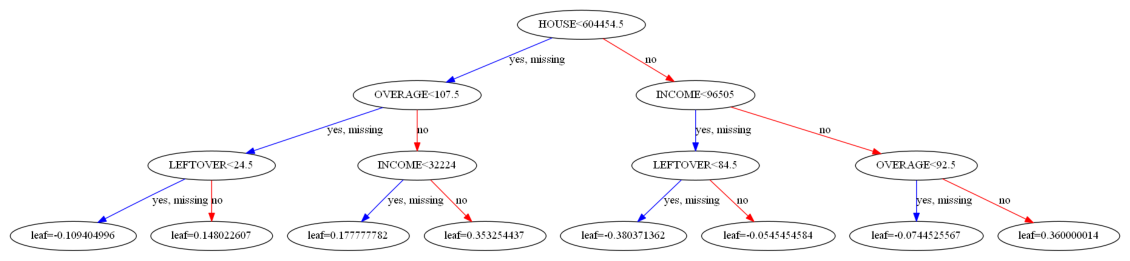

In [24]:
rcParams['figure.figsize'] = 20,20 # 파일 전체에 영향
plot_tree(model, num_trees = 0)
plt.show()

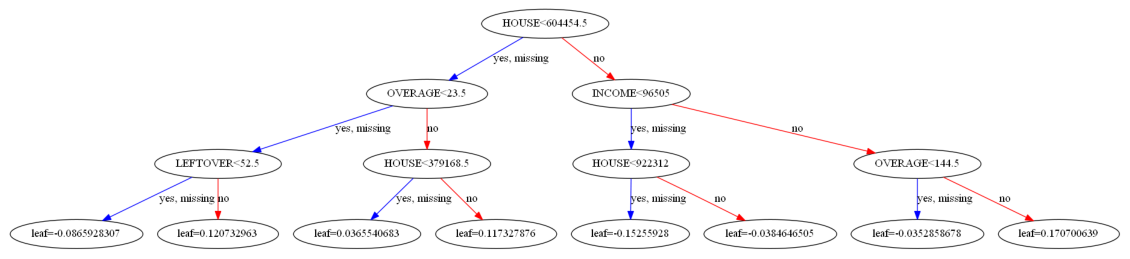

In [25]:
plot_tree(model, num_trees = 4)
plt.show()

### (2) 변수 중요도

In [26]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.         0.23316367 0.23149604 0.18991315 0.28209737 0.
 0.06332982 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


* 변수중요도 그래프 그리기 함수 만들기

In [17]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

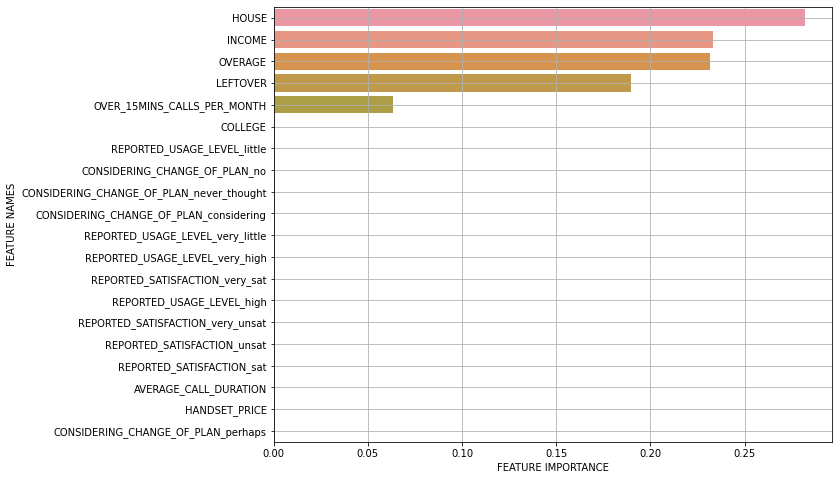

In [28]:
# max_depth = 3으로 설정하여 다른 변수들의 중요도가 산출되지 않는 것
result = plot_feature_importance(model.feature_importances_, x_train.columns)

## 5.실습 : 튜닝
* xgboost에 대해 grid search로 튜닝을 수행해 봅시다.
    * cv = 5
    * grid 파라미터
        - max_depth : 3~8 사이에서 3개 선택
        - n_estimators : 50~150 사이에서 3개 선택
        - learning_rate :0.01~ 0.2 사이에서 3개 선택

In [29]:
params = {'max_depth': [3, 5, 8], 'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}

In [30]:
m_gs = GridSearchCV(XGBClassifier(), params, cv=5)

In [31]:
m_gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [50, 100, 150]})

In [32]:
m_gs.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}

In [38]:
m_gs.best_score_

0.6914285714285715

In [39]:
pred = m_gs.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       769
           1       0.70      0.70      0.70       731

    accuracy                           0.71      1500
   macro avg       0.71      0.71      0.71      1500
weighted avg       0.71      0.71      0.71      1500



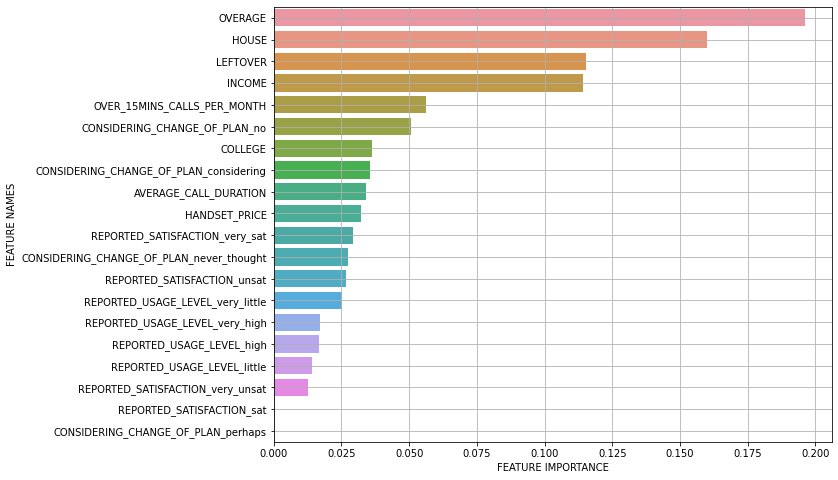

In [40]:
r = plot_feature_importance(m_gs.best_estimator_.feature_importances_, list(x_train))

In [33]:
result = pd.DataFrame(m_gs.cv_results_)
tmp = result.loc[:, ['param_max_depth', 'param_n_estimators', 'param_learning_rate', 'mean_test_score']]
tmp.head()

,param_max_depth,param_n_estimators,param_learning_rate,mean_test_score
0,3,50,0.01,0.688000
1,3,100,0.01,0.681143
2,3,150,0.01,0.684857
3,5,50,0.01,0.688000
4,5,100,0.01,0.691429


## 6.하이퍼파라미터 변화에 따른 성능 추세

### (1) n_estimators
* 1~150까지 증가시켜가며 성능 추세 살펴보기

In [41]:
grid_param = {'n_estimators':range(1,200,2)}
model = XGBClassifier()
model_gs = GridSearchCV(model, grid_param, cv = 3)
model_gs.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'n_estimators': range(1, 200, 2)})

In [42]:
result = pd.DataFrame(model_gs.cv_results_)

In [43]:
# 이 중에서 하이퍼파라미터 값에 따른 성능을 별도로 저장합시다.
temp = result.loc[:, ['param_n_estimators','mean_test_score']]
temp.head()

,param_n_estimators,mean_test_score
0,1,0.661712
1,3,0.674854
2,5,0.674856
3,7,0.672855
4,9,0.671428


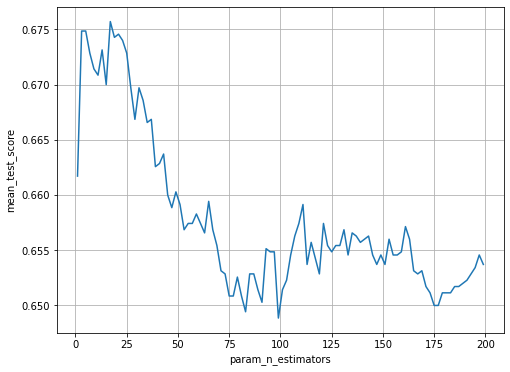

In [44]:
# 이를 차트로 그려봅시다.
plt.figure(figsize = (8,6))
sns.lineplot(x = 'param_n_estimators', y = 'mean_test_score', data = temp )
plt.grid()
plt.show()

### (2) learning rate
* 0.01 ~ 1까지 증가시켜가며 성능 추세 살펴보기

In [45]:
grid_param = {'learning_rate':np.linspace(0.01,1,100)}
model = XGBClassifier()
model_gs = GridSearchCV(model, grid_param, cv = 3)
model_gs.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])})

In [46]:
result = pd.DataFrame(model_gs.cv_results_)

In [47]:
# 이 중에서 하이퍼파라미터 값에 따른 성능을 별도로 저장합시다.
temp = result.loc[:, ['param_learning_rate','mean_test_score']]
temp.head()

,param_learning_rate,mean_test_score
0,0.01,0.682854
1,0.02,0.680284
2,0.03,0.679426
3,0.04,0.674570
4,0.05,0.677712


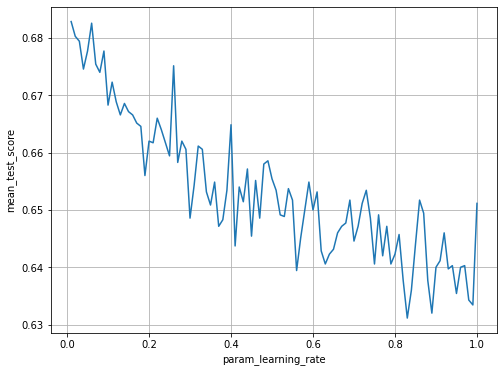

In [48]:
# 이를 차트로 그려봅시다.
plt.figure(figsize = (8,6))
sns.lineplot(x = 'param_learning_rate', y = 'mean_test_score', data = temp )
plt.grid()
plt.show()

### (3) n_estimators + learning rate
* 이번에는 두 하이퍼파라미터를 동시에 조절하며 추세를 살펴보겠습니다.
* n_estimators : 30, 50, 100, 150
* learning_rate : 0.05 ~ 0.3까지 0.01씩 증가

In [53]:
grid_param = {'learning_rate':np.linspace(0.001,0.05,20),
              'n_estimators':[20,30,50,100]}
model = XGBClassifier()
model_gs = GridSearchCV(model, grid_param, cv = 3)
model_gs.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': array([0.001     , 0.00357895, 0.00615789, 0.00873684, 0.01131579,
       0.01389474, 0.01647368, 0.01905263, 0.02163158, 0.02421053,
       0.02678947, 0.02936842, 0.03194737, 0.03452632, 0.03710526,
       0.03968421, 0.04226316, 0.04484211, 0.04742105, 0.05      ]),
                         'n_estimators': [20, 30, 50, 100]})

In [54]:
result = pd.DataFrame(model_gs.cv_results_)

In [55]:
# 이 중에서 하이퍼파라미터 값에 따른 성능을 별도로 저장합시다.
temp = result.loc[:, ['param_n_estimators', 'param_learning_rate','mean_test_score']]
temp.head()

,param_n_estimators,param_learning_rate,mean_test_score
0,20,0.001,0.665999
1,30,0.001,0.666285
2,50,0.001,0.666571
3,100,0.001,0.672285
4,20,0.003579,0.669428


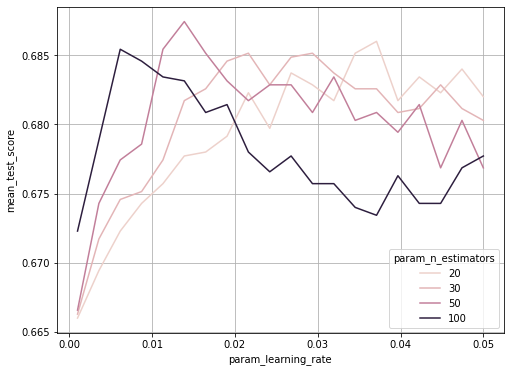

In [56]:
# 이를 차트로 그려봅시다.
plt.figure(figsize = (8,6))
sns.lineplot(x = 'param_learning_rate', y = 'mean_test_score', data = temp, hue = 'param_n_estimators')
plt.grid()
plt.show()